# Evaluating a classification model


## Agenda

- What is the purpose of **model evaluation**, and what are some common evaluation procedures?
- What is the usage of **classification accuracy**, and what are its limitations?
- How does a **confusion matrix** describe the performance of a classifier?
- What **metrics** can be computed from a confusion matrix?
- How can you adjust classifier performance by **changing the classification threshold**?
- What is the purpose of an **ROC curve**?
- How does **Area Under the Curve (AUC)** differ from classification accuracy?

## Review of model evaluation

- Need a way to choose between models: different model types, tuning parameters, and features
- Use a **model evaluation procedure** to estimate how well a model will generalize to out-of-sample data
- Requires a **model evaluation metric** to quantify the model performance

### Model evaluation procedures

1. **Training and testing on the same data**
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Classification accuracy

[Pima Indian Diabetes dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) from the UCI Machine Learning Repository

In [1]:
# read the data into a Pandas DataFrame
import pandas as pd
import zipfile
url = '~\\Downloads\\scikit-learn-videos-master\\scikit-learn-videos-master\\diabetic_data.csv'
col_names = ['encounter_id','patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id',
             'admission_source_id', 'time_in_hospital', 'payer_code	medical_specialty', 'num_lab_procedures', 'num_procedures', 
             'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 
             'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide','chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
             'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
             'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
             'diabetesMed', 'readmitted']
pima = pd.read_csv(url)

In [2]:
# print the first 5 rows of data
pima.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Question:** Can we predict the diabetes status of a patient given their health measurements?

In [3]:
# define X and y
feature_cols = ['num_lab_procedures', 'num_medications', 'number_emergency']
X = pima[feature_cols]
y = pima.time_in_hospital

In [4]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [7]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.212994261457


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [8]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

3     4509
2     4318
1     3572
4     3457
5     2539
6     1834
7     1462
8     1082
9      741
10     569
11     456
12     370
13     277
14     256
Name: time_in_hospital, dtype: int64

In [9]:
# calculate the percentage of ones
y_test.mean()

4.368838927757252

In [10]:
# calculate the percentage of zeros
1 - y_test.mean()

-3.3688389277572517

In [11]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

4.368838927757252

In [12]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

3    0.177227
Name: time_in_hospital, dtype: float64

Comparing the **true** and **predicted** response values

In [15]:
# print the first 25 true and predicted responses
print 'True:', y_test.values[0:5]
print 'Pred:', y_pred_class[0:5]

True: [3 2 4 2 6]
Pred: [2 3 4 3 3]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

In [16]:
# IMPORTANT: first argument is true values, second argument is predicted values
print metrics.confusion_matrix(y_test, y_pred_class)

[[1207 1361  927   74    2    0    1    0    0    0    0    0    0    0]
 [ 933 1612 1590  177    2    4    0    0    0    0    0    0    0    0]
 [ 688 1341 2077  386   12    4    1    0    0    0    0    0    0    0]
 [ 340  842 1803  427   20   12    9    4    0    0    0    0    0    0]
 [ 169  490 1292  506   32   12   26   12    0    0    0    0    0    0]
 [ 113  286  926  418   33   23   23   12    0    0    0    0    0    0]
 [  65  175  696  411   41   32   20   22    0    0    0    0    0    0]
 [  58  141  451  314   47   27   23   21    0    0    0    0    0    0]
 [  24   76  290  261   29   22   25   14    0    0    0    0    0    0]
 [  28   52  193  215   17   28   16   20    0    0    0    0    0    0]
 [  15   44  143  177   27   21   18   11    0    0    0    0    0    0]
 [  11   28  110  145   30   22   14   10    0    0    0    0    0    0]
 [  13   21   79  100   23   18   10   13    0    0    0    0    0    0]
 [   9   14   70   96   19   16   16   15    0    1

- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [17]:
# print the first 25 true and predicted responses
print 'True:', y_test.values[0:5]
print 'Pred:', y_pred_class[0:5]

True: [3 2 4 2 6]
Pred: [2 3 4 3 3]


In [19]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print TP, TN, FP, FN

1612 1207 1361 933


## Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [20]:
print (TP + TN) / float(TP + TN + FP + FN)
print metrics.accuracy_score(y_test, y_pred_class)

0.551339722277
0.212994261457


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [21]:
print (FP + FN) / float(TP + TN + FP + FN)
print 1 - metrics.accuracy_score(y_test, y_pred_class)

0.448660277723
0.787005738543


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [22]:
print TP / float(TP + FN)
print metrics.recall_score(y_test, y_pred_class)

0.633398821218
0.212994261457


C:\Users\antriv\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [23]:
print TN / float(TN + FP)

0.470015576324


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [24]:
print FP / float(TN + FP)

0.529984423676


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [25]:
print TP / float(TP + FP)
print metrics.precision_score(y_test, y_pred_class)

0.542213252607
0.166491558912


C:\Users\antriv\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Users\antriv\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

## Adjusting the classification threshold

In [26]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([2, 3, 4, 3, 3, 3, 2, 3, 2, 3], dtype=int64)

In [27]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.15304006,  0.19923819,  0.19616853,  0.1435598 ,  0.09454317,
         0.06659419,  0.04694234,  0.03187448,  0.02055894,  0.01474789,
         0.0112741 ,  0.00860035,  0.00700652,  0.00585144],
       [ 0.09513205,  0.16059217,  0.1839157 ,  0.16016743,  0.10988776,
         0.08480632,  0.06181287,  0.04580496,  0.02926209,  0.02083346,
         0.01660683,  0.01404675,  0.00934269,  0.00778891],
       [ 0.01116751,  0.03932918,  0.10512419,  0.13903869,  0.12945661,
         0.11997447,  0.10861295,  0.09279015,  0.06212013,  0.05510663,
         0.04443495,  0.03458385,  0.03112295,  0.02713774],
       [ 0.05605205,  0.1155821 ,  0.16617132,  0.15754249,  0.12379552,
         0.09938937,  0.07856601,  0.05912547,  0.04044102,  0.0312022 ,
         0.0243153 ,  0.01846911,  0.01596546,  0.01338258],
       [ 0.10292017,  0.16647243,  0.18389092,  0.15070169,  0.10957869,
         0.08223012,  0.06095059,  0.04320796,  0.02997942,  0.02164807,
         0.0166152 ,  0.01

In [28]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.19923819,  0.16059217,  0.03932918,  0.1155821 ,  0.16647243,
        0.18419334,  0.19972363,  0.18468331,  0.23055678,  0.14224151])

In [29]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [30]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

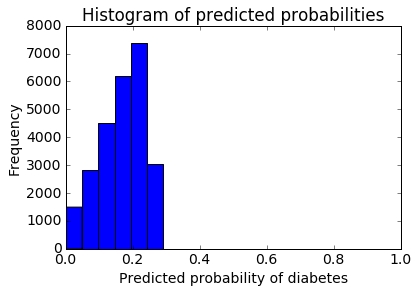

In [31]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [32]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

C:\Users\antriv\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [33]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.19923819,  0.16059217,  0.03932918,  0.1155821 ,  0.16647243,
        0.18419334,  0.19972363,  0.18468331,  0.23055678,  0.14224151])

In [34]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [35]:
# previous confusion matrix (default threshold of 0.5)
print confusion

[[1207 1361  927   74    2    0    1    0    0    0    0    0    0    0]
 [ 933 1612 1590  177    2    4    0    0    0    0    0    0    0    0]
 [ 688 1341 2077  386   12    4    1    0    0    0    0    0    0    0]
 [ 340  842 1803  427   20   12    9    4    0    0    0    0    0    0]
 [ 169  490 1292  506   32   12   26   12    0    0    0    0    0    0]
 [ 113  286  926  418   33   23   23   12    0    0    0    0    0    0]
 [  65  175  696  411   41   32   20   22    0    0    0    0    0    0]
 [  58  141  451  314   47   27   23   21    0    0    0    0    0    0]
 [  24   76  290  261   29   22   25   14    0    0    0    0    0    0]
 [  28   52  193  215   17   28   16   20    0    0    0    0    0    0]
 [  15   44  143  177   27   21   18   11    0    0    0    0    0    0]
 [  11   28  110  145   30   22   14   10    0    0    0    0    0    0]
 [  13   21   79  100   23   18   10   13    0    0    0    0    0    0]
 [   9   14   70   96   19   16   16   15    0    1

In [36]:
# new confusion matrix (threshold of 0.3)
print metrics.confusion_matrix(y_test, y_pred_class)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [3570    2    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [4318    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [4507    2    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [3457    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [2538    1    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [1834    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [1462    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [1082    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [ 741    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [ 569    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [ 456    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [ 370    0    0    0    0    0    0    

In [37]:
# sensitivity has increased (used to be 0.24)
print 46 / float(46 + 16)

0.741935483871


In [38]:
# specificity has decreased (used to be 0.91)
print 80 / float(80 + 50)

0.615384615385


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**